In [1]:
import fns
from fns import *
from fns.functionsTF import *
%matplotlib inline

today = datetime.date.today()
todayStr = '%04d%02d%02d' % (today.year, today.month, today.day)
# todayStr = '20151005'
DIRECTORY = os.path.expanduser("~/Dropbox/0000_PhD/figures/"+todayStr+"/")
CSV_DIR_TODAY = os.path.expanduser("~/Dropbox/0000_PhD/csv/"+todayStr+"/")
CSV_DIR = os.path.expanduser("~/Dropbox/0000_PhD/csv/")
FIG_DIR = os.path.expanduser("~/Dropbox/0000_PhD/figures/")
if not os.path.exists(DIRECTORY):
    os.makedirs(DIRECTORY)
    
from bokeh.io import output_notebook
output_notebook()
from IPython.display import clear_output, Image, display

********************************************************************************
functionsTFhardbound loaded!
********************************************************************************
10 8 2


Loading BokehJS ...

In [2]:
N, g, tauv, i, nu = 500, 7,15,0,100
T = 1000

gpu = TfSingleNet(N=N,
                  T=T,
                  disp=False,
                  tauv=45,
                  device='/gpu:0',
                  spikeMonitor=True,
                  g0=g,
                  startPlast = 10,
                  nu = nu,
                  NUM_CORES = 1)
# gpu.input = apple
print(gpu.lowspthresh)
gpu.lowspthresh = 1.5
gpu.weight_step = 10
gpu.input = np.concatenate([np.zeros(T//2),np.ones(T//2)*50])
gpu.dt = 0.1
gpu.ratio = 1
gpu.FACT = 50
gpu.runTFSimul()


1.5
500 400 100
6.80


In [4]:
def convertRaster(r):
    T = r.shape[1]
    x,y = [],[]
    for i in range(T):
        yi = np.ravel(np.where(r[:,i]==1)).tolist()
        y.append(yi)
        x.append(np.ones(len(yi))*i)
    x = np.concatenate(x)
    y = np.concatenate(y)
    return x,y

def plotRaster(r):
    a = 6
    b = 3
    x,y = convertRaster(r.transpose())
    aspect = b/a
    fig  = plt.figure(figsize=(a,b))
    ax = fig.add_subplot(111)
    # ax.imshow(gpu1.raster[100:1100].transpose(), aspect=aspect)
    ax.plot(x,y, '.', color='grey', alpha=0.1)

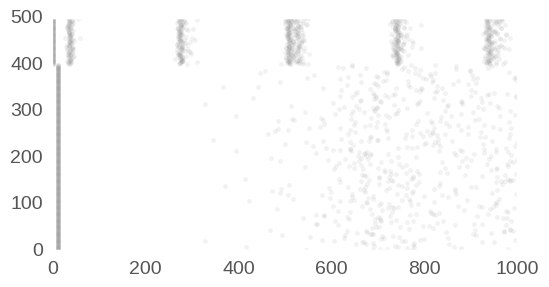

In [5]:
plotRaster(gpu.raster)

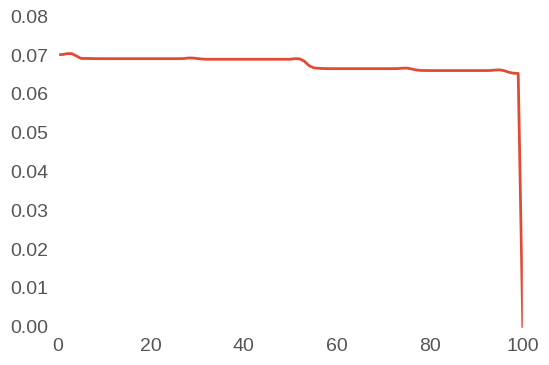

In [6]:
plt.plot(gpu.gamma)